<a href="https://colab.research.google.com/github/lalopezpa/stochastics/blob/main/Tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



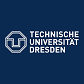

>**Stochastic Modeling and Simulation**

> Winter Semester 2024/25







The following questions are for helping you in understanding the contents of the lecture. Your answers will not be collected or graded but we will discuss the solutions in the class. If you cannot easily answer the questions or have doubts regarding the correctness of your answers, please take a few minutes to review the contents in the book or through the web. Also, please feel free to ask your questions and concerns about the questions in the tutorial classes or in the Forum in the Opal.

In the code cells, please change the ***None*** values between **##start** and **##end** to a desirable code or value. Then, you can run the cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Continuous Distribution

Complete the bellow code to plot a normal distribution density function with mean = 6 and SD = 2

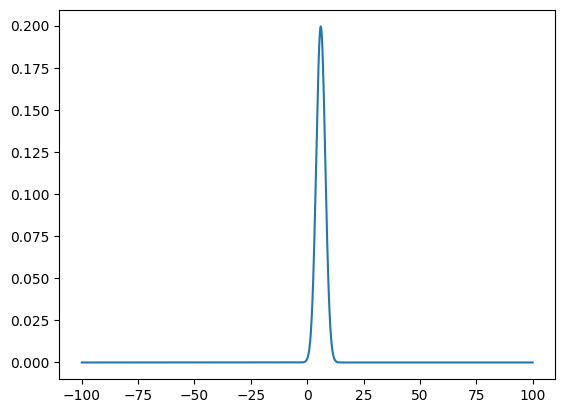

In [3]:
x_axis = np.arange(-100, 100, 0.001)

##start
plt.plot(x_axis, norm.pdf(x_axis,6,2))
plt.show()
##end

Concerning the definition of the expected value of continuous random variables and the above PDF function, can you calculate $M_1 = \int_{- \infty}^{\infty} P_{(x)}x\;\mathrm{d}x$ where $P$ is the PDF of the above normal distribution?

**$M_1$ is the first moment of $P$**. Can you calculate the second moment?

Run the below cell to sample 10 numbers from the above distribution.

In [4]:
X = np.random.normal(6,2,10)
print(X)

[5.1544719  5.71871401 7.14419616 7.69314266 9.10030279 8.41038471
 8.29342537 5.00987421 7.41379016 8.31082021]


Assume that **we don't know the distribution's mean and variance**. How can we estimate the variance of the distribution concerning these ten numbers?
Could you write a formula for your estimator?

In the below cell, write a function to get the vector of the sampled number and return us a number as an estimation for the distribution variance.

In [5]:
def Variance_Estimator(X):
  '''
  X is a vector that contains our random variables sampled from the distribution.
  '''

  ## start

  N = X.shape[0]  # number of samples
  Mean = np.mean(X)  # mean of the samples
  Var = np.sum((X - Mean)**2) / (N - 1)  # variance formula

  ## end

  return Var

In the below cell, you can test your function. By increasing the number of random variables, the estimator should be approximately equal to the real variance. Check if your estimator works well with n = 1000.

What about n = 100000?

In [7]:
##start
n = 1000
##end

X = np.random.normal(6,2,n)

Var = Variance_Estimator(X)

print("Real Variance = ", 4)
print("Your Estimation =", Var)

Real Variance =  4
Your Estimation = 4.020998288081918


A good estimator for the variance could be this formula:

$Var(x) = (\sum \limits _{i=1} ^{N} x_{i}^2)/(N-1)$

Run the below cell to define a function based on this formula, and then run the above cell again. Does it work?

In [ ]:
def Variance_Estimator(X):
  '''
  X is a vector that contains our random variables sampled from the distribution.
  '''
  N = X.shape[0]
  Mean = np.mean(X)
  Var = np.sum(X**2-Mean**2)/(N-1)


  return Var

Suppose we define function ***$f$*** as $f(x) = x^2$, and $x$ is the random variable from the above distribution. How can we calculate $Exp(f) = \int_{- \infty}^{\infty} f_{(x)} P_{(x)}\;\mathrm{d}x$ concerning the mean and variance of the distribution?

This is the second moment of function $P$.

You can estimate this second moment by n random samples obtained in the previous part.

In [ ]:
mean = 6
SD = 2
print('M2 = ', mean**2 + SD**2)
print('Estimated M2 = ', (X**2).mean())

# Discrete Distribution

Assume we tossed a fair dice 10,000 times. As we saw in the lecture notes, the results should follow a uniform distribution between 1 and 6. What is the expected value of oucome?

Could you complete the below cell to simulate this experiment?

In [ ]:
## start
N = 10000
data = np.random.randint(low = None, high= None, size= N, dtype=int)
## end

unique, counts = np.unique(data, return_counts=True)
plt.scatter(unique, counts/N)
plt.xlabel("outcome")
plt.ylabel("frequency / N")
plt.ylim([0, 1])

Assume in the previous experiment, we had a red (r) and a blue (b) dice.
Suppose we toss both and write their sum $ x =  r +  b$ each time.

1. Can you estimate the $Exp(x)$ concerning the previous experiment? (We calculated the expected value for one dice in the previous experiment.)

2. What about $Exp(w)$ where $w = 10 \cdot r + 2\cdot b$ ?

3. What is the probability mass function (PMF) of $x$?

The code below can give us a possible result for 10,000 tossings. See if your estimations work here!

In [ ]:
## start
N = 10000
data_r = np.random.randint(low = 1, high= 7, size= N, dtype=int)
data_b = None
sum = 10*data_r + 2*data_b
## end

unique, counts = np.unique(sum, return_counts=True)
plt.scatter(unique, counts/N)
plt.xlabel("outcome")
plt.ylabel("frequency / N")
plt.ylim([0, 1])

What if we repeated this experiment with ten different dice? Let's do this and also compare the result with the normal distribution!

In [ ]:
N = 10000
sum = np.random.randint(low = 1, high= 7, size= N, dtype=int)
for i in range(9):
  ## start
  sum += None
  ## end

x_axis = np.arange(10, 60, 0.001)
unique, counts = np.unique(sum, return_counts=True)
plt.scatter(unique, counts/N)
plt.plot(x_axis, norm.pdf(x_axis,35,4), 'r')
plt.xlabel("outcome")
plt.ylabel("frequency / N")
plt.ylim([0, 1])

In the two-dice experiment,

1. what is the joint probability $P_{red,blue} (red < blue)$?

2. What is the marginal distribution of blue dice?

3. What is the conditional probability $P(red = 3 | sum = 4)$?

4. What is the $Exp(m)$ where $m = red \cdot blue$ ?

Let's Simulate the answers

In [ ]:
N = 10000
data_r = np.random.randint(low = 1, high= 7, size= N, dtype=int)
data_b = np.random.randint(low = 1, high= 7, size= N, dtype=int)
##start
def Joint_Prob(data_r, data_b, N):
  J = 0
  for i in range (data_r.shape[0]):
    if data_r[i]<data_b[i]:
      J += 1

  J = J/N

  return J

print("Estimated Joint Probability red < blue = ", None)

def Cond_Prob(data_r, data_b,N):
  C = 0
  for i in range (data_r.shape[0]):
    if data_r[i]+data_b[i]:
      if data_r[i] == 3:
        C += 1
  C = C/N

  return C

print("Estimated Pr(red = 3) if sum == 4  = ", None)


def Exp_Mul(data_r, data_b, N):

  dot = data_r*data_b

  E = dot.mean()

  return E

print("Estimated Expectation(red * blue) ", None)

##End

# Scale Free Distributions

A classic example of a scale-free distribution is the power low :

$P_{(x)} = x^{-a}, a > 0$

Run the below code and see the difference between this distribution and normal distribution

In [ ]:
fig, ax = plt.subplots(4,2)

x1_axis = np.arange(0, 0.5, 0.001)
x2_axis = np.arange(1.5, 2, 0.001)
x3_axis = np.arange(3.5, 4, 0.001)
x4_axis = np.arange(4.5, 5, 0.001)

##start
ax[0,0].plot(x1_axis, norm.pdf(x1_axis,0,0.25), 'r')
ax[0,1].plot(x1_axis, x1_axis ** (-2), 'b')
ax[1,0].plot(x2_axis, norm.pdf(x2_axis,0,0.25), 'r')
ax[1,1].plot(x2_axis, x2_axis ** (-2), 'b')
ax[2,0].plot(x3_axis, norm.pdf(x3_axis,0,0.25), 'r')
ax[2,1].plot(x3_axis, x3_axis ** (-2), 'b')
ax[3,0].plot(x4_axis, norm.pdf(x4_axis,0,0.25), 'r')
ax[3,1].plot(x4_axis, x4_axis ** (-2), 'b')
plt.subplots_adjust(wspace=0.4,
                    hspace=0.4)
plt.show()